In [1]:
import models.CNN.model as CNN
import importlib
import numpy as np
import argparse
from pathlib import Path
import torch
import json
from models.hyperparams import ImageType, LearningRule, WeightScale, Inhibition, oneHotEncode
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from tqdm.auto import tqdm
import itertools
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import models.learning as L

transform = transforms.Compose(
    [transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataloader = DataLoader(test_dataset, batch_size=1)

/Users/zhaoyizhe/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/zhaoyizhe/miniconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/zhaoyizhe/miniconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <539E3895-EEBD-3044-801F-9B618F314545> /Users/zhaoyizhe/miniconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Files already downloaded and verified
Files already downloaded and verified


In [4]:
topdown = False

In [13]:
import importlib

In [57]:
importlib.reload(L)
importlib.reload(CNN)

<module 'models.CNN.model' from '/Users/zhaoyizhe/Documents/GitHub/biological-deep-learning/models/CNN/model.py'>

In [3]:
with open("modelconfig.json", "r") as file:
        config = json.load(file)

In [58]:
importlib.reload(L)

<module 'models.learning' from '/Users/zhaoyizhe/Documents/GitHub/biological-deep-learning/models/learning.py'>

In [59]:
mymm = CNN.CNN_Model_from_config((3,32,32), config, LearningRule.SoftHebb, WeightScale.WeightNormalization, LearningRule.SoftHebb, Inhibition.RePU, 'cpu', 10)
mymodelCNN = CNN.CNN_Experiment(epoch=1, mymodel=mymm, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'))

New Image Dimensions after Convolution : (32, 14, 14)
New Image Dimensions after Convolution : (128, 6, 6)
New Image Dimensions after Convolution : (512, 2, 2)
Fully connected layer input dim : 2048


  0%|          | 0/50000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [29]:
model = CNN.CNNBaseline_Model(inputshape=(3, 32, 32), kernels=[5, 3, 3], channels=[32, 128, 512], strides=[1, 1, 1],
                                  padding=[1, 1, 1], lambd=1, lr=1e-4, gamma=0.99, epsilon=0.01, b=1,
                                  rho=0.001, nbclasses=10, topdown=topdown, device="cpu", eta=0.1,
                                  learningrule=CNN.Learning.SoftHebb,
                                  weightscaling=CNN.WeightScale.No,
                                  outputlayerrule=CNN.ClassifierLearning.SoftHebb, triangle=True, whiten_input=True)

mymodelCNN = CNN.CNN_Experiment(epoch=1, mymodel=model, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'))

print(CNN.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

New Image Dimensions after Convolution : (32, 30, 30)
New Image Dimensions after Convolution : (128, 30, 30)
New Image Dimensions after Convolution : (512, 30, 30)
Fully connected layer input dim : 460800


  0%|          | 0/50000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [12]:
def view(h1):
    ac1 = h1.squeeze().detach().to('cpu')
    print(ac1.shape)
    nbe = int(math.ceil(math.sqrt(ac1.size(0))))


    fig, axes = plt.subplots(nbe, nbe, figsize=(20,20))
    for i, ax in enumerate(axes.flat):
        if i > ac1.size(0)-1:
            break
        ax.imshow(ac1[i])
    plt.show()

In [13]:
inp, lab = next(iter(test_dataloader))
image = inp[0].permute(1,2,0)
label = lab[0]
input1 = inp[0].unsqueeze(0)

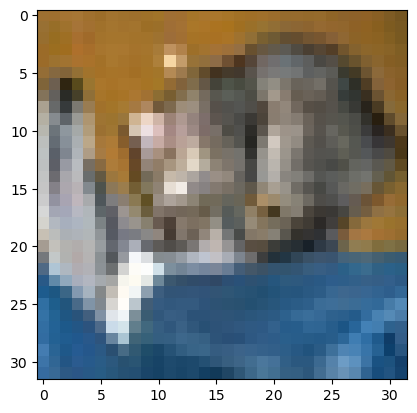

In [28]:
plt.imshow(image)

In [26]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)

torch.Size([32, 15, 15])


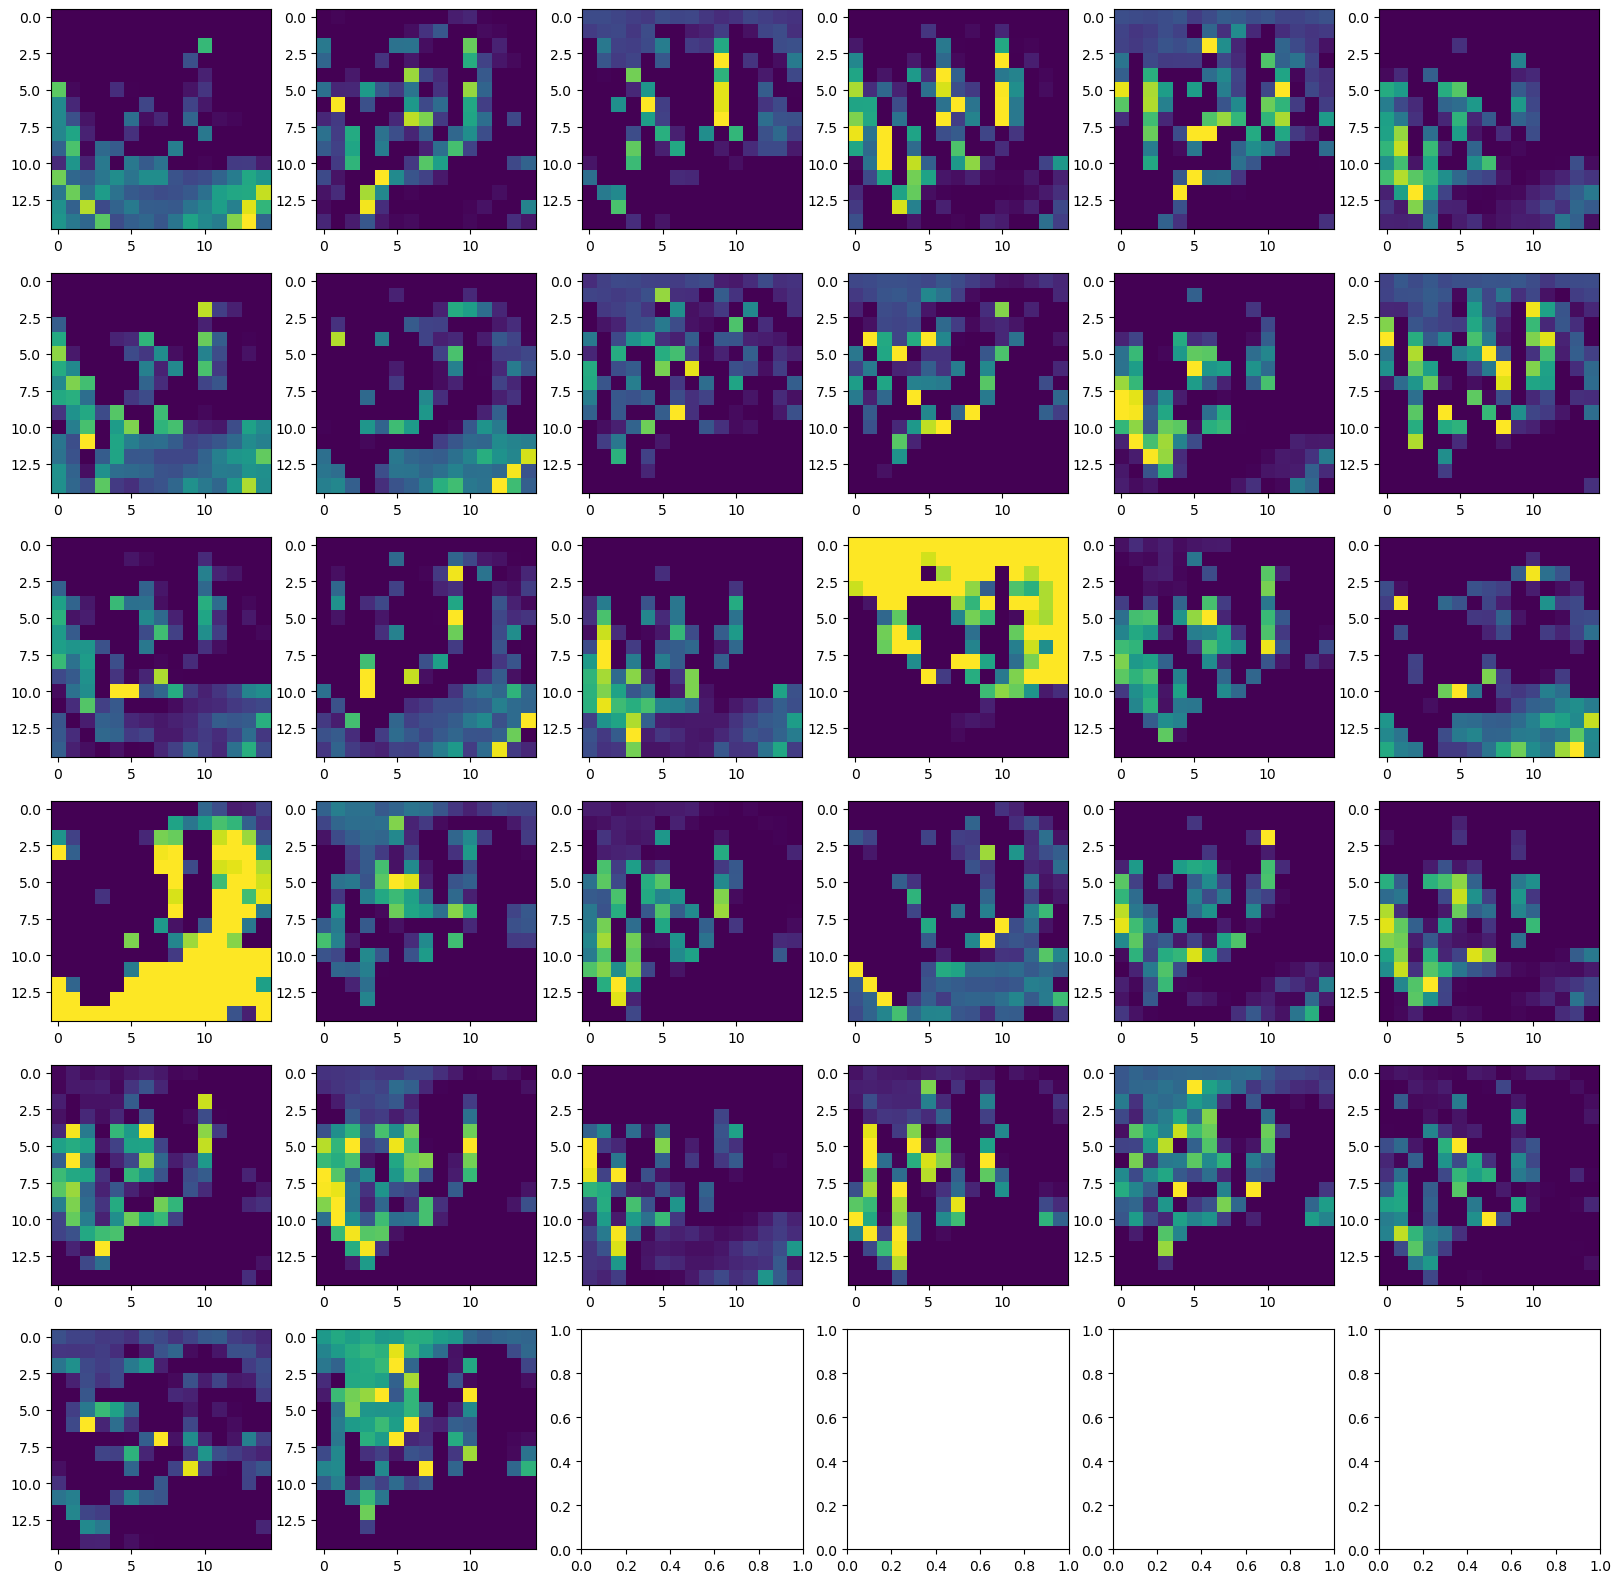

In [27]:
view(o1)